In [1]:
import pandas as pd
import numpy as np
import scipy.stats as scs
from skimage.io import imread
import util
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import os
%matplotlib inline

In [15]:
train_data = []
test_data = []
test_names = []
train_names = []
for root, files in util.get_person_images('./lfw_funneled/', 'jpg', 70):
    name, data, amount = util.get_dataset(root, files, 8)
    # save name vector
    test_names.append(name)
    train_names.extend([name]*(amount-1))
    train_data.append(data[:-1]) # without last
    test_data.append(data[-1:]) # only last
    

In [23]:
train_design_matrix = np.asmatrix(np.concatenate(train_data))
test_design_matrix = np.asmatrix(np.concatenate(test_data))

In [34]:
test_names, train_design_matrix.shape, test_design_matrix.shape

(['Colin_Powell',
  'George_W_Bush',
  'Hugo_Chavez',
  'Ariel_Sharon',
  'Tony_Blair',
  'Gerhard_Schroeder',
  'Donald_Rumsfeld'],
 (1281, 1024),
 (7, 1024))

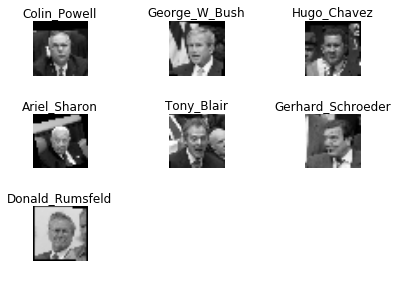

In [33]:
# Plot the test data
fig = plt.figure()
for i, row in enumerate(test_design_matrix):
    ax = plt.subplot(3,3,i+1)
    ax.set_title("{}".format(test_names[i]))
    plt.axis('off')
    plt.tight_layout()
    dim = np.sqrt(row.shape[1])
    plt.imshow(np.reshape(row, (dim, dim)), cmap=plt.gray(), )

In [36]:
def align(mat):
    mean = mat.mean()

In [45]:
train_mean = np.mean(train_design_matrix, axis=1)
test_mean = np.mean(test_design_matrix, axis=1)
train_aligned = train_design_matrix - train_mean
test_aligned = test_design_matrix - test_mean

In [58]:
u, d, v = np.linalg.svd(train_aligned, full_matrices=False)
u.shape, d.shape, v.shape

((1281, 1024), (1024,), (1024, 1024))

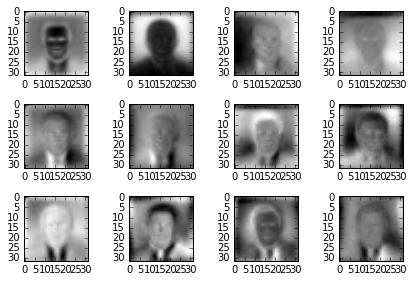

In [61]:
# Plot the first 12 eigenfaces
fig = plt.figure()
for i, eigenface in enumerate(v[:12], start=1):
    plt.subplot(3, 4, i)
    plt.tight_layout()
    dim = np.sqrt(eigenface.shape[1])
    plt.imshow(np.reshape(eigenface, (dim, dim)), cmap=plt.gray())

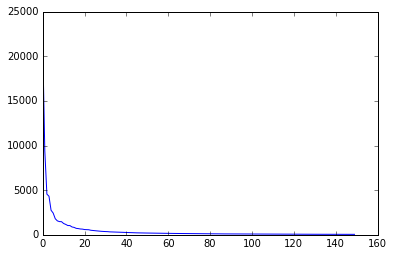

In [62]:
eigenvalues = d**2
eigenvalues
# Plot first 150 Eigenvalues
plt.plot(eigenvalues[:150])
plt.show()

In [63]:
features = 7
train_projected = np.dot(v[:features], train_aligned.T).T
test_projected = np.dot(v[:features], test_aligned.T).T

In [67]:
print("Shape Projiziert: train {}, test {}".format(np.shape(train_projected), np.shape(test_projected)))

Shape Projiziert: train (1281, 7), test (7, 7)


In [68]:
print("Shape V:", v[:7].shape, " Shape test zentriert:", test_aligned.shape, " Shape Training zentriert:", train_aligned.shape)

Shape V: (7, 1024)  Shape test zentriert: (7, 1024)  Shape Training zentriert: (1281, 1024)


((7, 3969), (1281, 3969))

In [104]:
result = {'Test': [], 'Klassifikation' : [], 'Index': []}

for index, a in enumerate(test_projected):
    # subtract each projected test data from all projected learned data
    subtr = train_projected - a
    # calculate the length of each subtracted data
    distances = np.linalg.norm(subtr, axis=1)
    # take the data with minimal length
    id = distances.argmin()
    name_classification = train_names[id]
    result['Test'].append(names[index])
    result['Klassifikation'].append(name_classification)
    result['Index'].append(id)

In [105]:
pd.DataFrame(result)

,Index,Klassifikation,Test
0,1018,Tony_Blair,Colin_Powell
1,654,George_W_Bush,George_W_Bush
2,798,Hugo_Chavez,Hugo_Chavez
3,843,Ariel_Sharon,Ariel_Sharon
4,1090,Gerhard_Schroeder,Tony_Blair
5,662,George_W_Bush,Gerhard_Schroeder
6,182,Colin_Powell,Donald_Rumsfeld


1.0179602570000652